In [16]:
import pickle

def load():
    with open('explanations_clintox.pkl', 'rb') as f:
        loaded_dict = pickle.load(f)
    return loaded_dict
dic = load()


In [17]:
from pprint import pprint
pprint(dic[list(dic.keys())[10]])

{'data': Batch(batch=[5], edge_attr=[8, 3], edge_index=[2, 8], ptr=[2], smiles=[1], x=[5, 9], y=[1]),
 'deep_lift_edge_level_explanations': [tensor([-0.7571, -0.7571, -0.6796, -1.0088, -0.7571, -0.6796, -1.0088, -0.7571,
        -0.1690, -1.3453, -0.0139, -0.6723, -0.1690]),
                                       tensor([0.7436, 0.7436, 0.6667, 0.9883, 0.7436, 0.6667, 0.9883, 0.7436, 0.1641,
        1.3231, 0.0102, 0.6534, 0.1641])],
 'gnnExplainer_edge_level_explanations': [tensor([ 0.5171, -1.6248, -0.6023, -1.2164, -0.2528,  1.3926, -1.3411,  0.9157,
         1.0611,  0.1030, -2.3937,  0.7638, -0.5501]),
                                          tensor([-0.5529, -1.8877, -0.9982, -0.7532,  1.2088, -0.0685, -0.2325, -1.5521,
         0.2155, -0.3113,  0.1140, -0.6692,  1.0859])],
 'gnn_lrp_path_level_explanations': {'ids': tensor([[ 0,  1,  0],
        [ 0,  1,  8],
        [ 0,  2,  5],
        [ 0,  2, 10],
        [ 0,  3,  6],
        [ 0,  3, 11],
        [ 0,  4,  7],
        [

In [6]:
data = dic[list(dic.keys())[0]]['data']
print(data)

Batch(batch=[24], edge_attr=[46, 3], edge_index=[2, 46], ptr=[2], smiles=[1], x=[24, 9], y=[1])


In [9]:

from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem, rdBase
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import rdMolDraw2D
from json import dumps
m = Chem.MolFromSmiles(data.smiles[0])

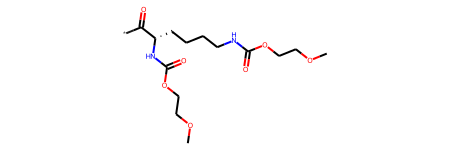

In [10]:
m

In [14]:

COLS = [(1.0, 0.0, 0.0), (0.0, 1.0, 0.0),
        (0.0, 0.0, 1.0), (1.0, 0.55, 1.0)]

In [39]:

def get_hit_atoms_and_bonds(mol, smt):
    alist = []
    blist = []
    q = Chem.MolFromSmarts(smt)
    for match in mol.GetSubstructMatches(q):
        alist.extend(match)

    for ha1 in alist:
        for ha2 in alist:
            if ha1 > ha2:
                b = mol.GetBondBetweenAtoms(ha1, ha2)
                if b:
                    blist.append(b.GetIdx())
    
    return alist, blist


def add_colours_to_map(els, cols, col_num):
    for el in els:
        if el not in cols:
            cols[el] = []
        if COLS[col_num] not in cols[el]:
            cols[el].append(COLS[col_num])

neg_color = (1.0, 0.0, 0.0)
pos_color = (0.0, 1.0, 0.0)

def do_a_picture(smi, smarts, relevances_scale, filename, label, fmt='svg'):

    rdDepictor.SetPreferCoordGen(True)
    mol = Chem.MolFromSmiles(smi)
    mol = Draw.PrepareMolForDrawing(mol)

    acols = {}
    bcols = {}
    h_rads = {}
    h_lw_mult = {}

    for i, smt in enumerate(smarts):
        for idx , (walk, rel) in enumerate(relevances_scale):
            for el in walk:
                if el not in acols.keys():
                    if rel < 0:
                        acols[el] = [neg_color]
                    else:
                        acols[el] = [pos_color]
        
        
    if fmt == 'svg':
        d = rdMolDraw2D.MolDraw2DSVG(300, 300)
        mode = 'w'
    elif fmt == 'png':
        d = rdMolDraw2D.MolDraw2DCairo(300, 300)
        mode = 'wb'
    else:
        print('unknown format {}'.format(fmt))
        return
    rdMolDraw2D.MolDraw2D
    
    d.drawOptions().fillHighlights = True
    d.DrawMoleculeWithHighlights(mol, label, acols, bcols, h_rads, h_lw_mult, -1)
    d.FinishDrawing()
    print(d)
    with open(filename, mode) as f:
        #d.Get
        f.write(d.GetDrawingText())

In [42]:
exs, x_collector = from_smiles(data.smiles[0],data_in="clintox",model_type="gcn", method="deeplift")
relevances_scale = create_relevance_from_explanation(data[0],exs,method = "deeplift")

do_a_picture(data.smiles[0], [data.smiles[0]], relevances_scale,'atom_highlights_3_v1.png', '', fmt='png')


  0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
smi = 'CO[C@@H](O)C1=C(O[C@H](F)Cl)C(C#N)=C1ONNC[NH3+]'
smarts = ['CONN', 'N#CC~CO', 'C=CON', 'CONNCN']
smarts_1 = ['CONN']

In [29]:
do_a_picture(smi, [smi], 'atom_highlights_3_v1.png', '', fmt='png')

TypeError: do_a_picture() missing 1 required positional argument: 'label'

In [20]:
dic[list(dic.keys())[0]]

{'index': 0,
 'data': Batch(batch=[24], edge_attr=[46, 3], edge_index=[2, 46], ptr=[2], smiles=[1], x=[24, 9], y=[1]),
 'deep_lift_edge_level_explanations': [tensor([-0.2555, -0.2555, -0.0151,  0.1416, -0.0151,  0.1416,  0.0547,  0.1620,
           0.0547, -0.0685, -0.0685, -0.1163, -0.1163, -0.0832, -0.0832,  0.0446,
           0.0446,  0.1082,  0.1082, -0.1291, -0.0482, -0.1291, -0.0482, -0.0362,
          -0.0362,  0.0902,  0.0902, -0.1021, -0.1021, -0.0659, -0.0659,  0.1620,
           0.1325,  0.1325, -0.1275, -0.0485, -0.1275, -0.0485, -0.0334, -0.0334,
           0.0903,  0.0903, -0.1021, -0.1021, -0.0659, -0.0659, -0.6560,  0.1451,
          -0.1752,  0.1382, -0.0287, -0.1083, -0.1243, -0.0422,  0.1314,  0.0849,
          -0.3431, -0.1813,  0.1089,  0.0715, -0.2757,  0.1440,  0.1859,  0.0790,
          -0.3340, -0.1760,  0.1092,  0.0715, -0.2757,  0.1440]),
  tensor([ 0.2556,  0.2556,  0.0151, -0.1417,  0.0151, -0.1417, -0.0548, -0.1622,
          -0.0548,  0.0686,  0.0686,  0.

In [41]:
from data_from_smile import process_out
from create_explanations import from_smiles
from torch_geometric.utils.loop import add_remaining_self_loops

def create_relevance_from_explanation(data, exs, method="deeplift"):
    #print(method, data)
    relevances_scale = []
    all_edges = add_remaining_self_loops(data.edge_index)[0]
    if method == "deeplift":    
        try:
            for id in range(all_edges.size()[1]):
                relevances_scale.append(([all_edges[0][id].item(),all_edges[1][id].item()], exs[1][id].item()-exs[0][id].item()) )
        except Exception as e:
            return []
        
    elif method == "gradcam":
        try:
            for id in range(all_edges.size()[1]):
                relevances_scale.append(([all_edges[0][id].item(),all_edges[1][id].item()], exs[1][id].item()-exs[0][id].item()) )
        except Exception as e:
            return []
            
    elif method=="gnnexplainer":
        try:
            for id in range(all_edges.size()[1]):
                relevances_scale.append(([all_edges[0][id].item(),all_edges[1][id].item()], exs[1][id].item()-exs[0][id].item()) )
        except Exception as e:
            return []

    elif method == "gnnlrp":
        try:
            #print("comes to gnnlrp")
            #print(exs)
            for id in range(exs['ids'].size()[0]): #scores
                node_list = []
                
                for idx, edge in enumerate(exs['ids'][id].tolist()):
                    if idx==0:
                        node_list.append(all_edges[0][edge].item())
                        node_list.append(all_edges[1][edge].item())
                    else:
                        node_list.append(all_edges[1][edge].item())
                relevances_scale.append((node_list, exs['score'][id][1].item()-exs['score'][id][0].item()) )
        except Exception as e:
            return []
    return relevances_scale


In [38]:
exs, x_collector = from_smiles(data.smiles[0],data_in="clintox",model_type="gcn", method="deeplift")
relevances_scale = create_relevance_from_explanation(data[0],exs ,method = "deeplift")

do_a_picture(data.smiles[0], [data.smiles[0]], relevances_scale,'atom_highlights_3_v1.png', '', fmt='png')

#print(relevances_scale)

  0%|          | 0/1 [00:00<?, ?it/s]

{0: [(0.0, 1.0, 0.0)], 1: [(0.0, 1.0, 0.0)], 2: [(0.0, 1.0, 0.0)], 3: [(1.0, 0.0, 0.0)], 4: [(1.0, 0.0, 0.0)], 16: [(1.0, 0.0, 0.0)], 5: [(0.0, 1.0, 0.0)], 6: [(0.0, 1.0, 0.0)], 7: [(0.0, 1.0, 0.0)], 8: [(1.0, 0.0, 0.0)], 9: [(1.0, 0.0, 0.0)], 10: [(0.0, 1.0, 0.0)], 11: [(0.0, 1.0, 0.0)], 12: [(0.0, 1.0, 0.0)], 13: [(1.0, 0.0, 0.0)], 14: [(0.0, 1.0, 0.0)], 15: [(0.0, 1.0, 0.0)], 17: [(1.0, 0.0, 0.0)], 18: [(0.0, 1.0, 0.0)], 19: [(0.0, 1.0, 0.0)], 20: [(0.0, 1.0, 0.0)], 21: [(1.0, 0.0, 0.0)], 22: [(0.0, 1.0, 0.0)], 23: [(0.0, 1.0, 0.0)]}


In [46]:
def get_hit_atoms_and_bonds(mol, smt):
    alist = []
    blist = []
    q = Chem.MolFromSmarts(smt)
    for match in mol.GetSubstructMatches(q):
        alist.extend(match)
    for ha1 in alist:
        for ha2 in alist:
            if ha1 > ha2:
                b = mol.GetBondBetweenAtoms(ha1, ha2)
                if b:
                    print(ha1, ha2)
                    blist.append(b.GetIdx())
    
    return alist, blist
smi = data.smiles[0]
print(smi)
print(data.edge_index)
mol = Chem.MolFromSmiles(smi)
mol = Draw.PrepareMolForDrawing(mol)
_, _ = get_hit_atoms_and_bonds(mol, smi)

*C(=O)[C@H](CCCCNC(=O)OCCOC)NC(=O)OCCOC
tensor([[ 0,  1,  1,  1,  2,  3,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
          9,  9,  9, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 16, 16, 17, 17, 17,
         18, 19, 19, 20, 20, 21, 21, 22, 22, 23],
        [ 1,  0,  2,  3,  1,  1,  4, 16,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,
          8, 10, 11,  9,  9, 12, 11, 13, 12, 14, 13, 15, 14,  3, 17, 16, 18, 19,
         17, 17, 20, 19, 21, 20, 22, 21, 23, 22]])
1 0
2 1
3 1
4 3
5 4
6 5
7 6
8 7
9 8
10 9
11 9
12 11
13 12
14 13
15 14
16 3
17 16
18 17
19 17
20 19
21 20
22 21
23 22


In [47]:
import pickle

def load():
    with open('explanations_clintox.pkl', 'rb') as f:
        loaded_dict = pickle.load(f)
    return loaded_dict
dic = load()


In [53]:
from pprint import pprint
pprint(dic[list(dic.keys())[0]])
data = dic[list(dic.keys())[0]]['data']
smile = data.smiles[0]
print(smile)
all_edges = add_remaining_self_loops(data.edge_index)[0]

{'data': Batch(batch=[24], edge_attr=[46, 3], edge_index=[2, 46], ptr=[2], smiles=[1], x=[24, 9], y=[1]),
 'deep_lift_edge_level_explanations': [tensor([-0.2555, -0.2555, -0.0151,  0.1416, -0.0151,  0.1416,  0.0547,  0.1620,
         0.0547, -0.0685, -0.0685, -0.1163, -0.1163, -0.0832, -0.0832,  0.0446,
         0.0446,  0.1082,  0.1082, -0.1291, -0.0482, -0.1291, -0.0482, -0.0362,
        -0.0362,  0.0902,  0.0902, -0.1021, -0.1021, -0.0659, -0.0659,  0.1620,
         0.1325,  0.1325, -0.1275, -0.0485, -0.1275, -0.0485, -0.0334, -0.0334,
         0.0903,  0.0903, -0.1021, -0.1021, -0.0659, -0.0659, -0.6560,  0.1451,
        -0.1752,  0.1382, -0.0287, -0.1083, -0.1243, -0.0422,  0.1314,  0.0849,
        -0.3431, -0.1813,  0.1089,  0.0715, -0.2757,  0.1440,  0.1859,  0.0790,
        -0.3340, -0.1760,  0.1092,  0.0715, -0.2757,  0.1440]),
                                       tensor([ 0.2556,  0.2556,  0.0151, -0.1417,  0.0151, -0.1417, -0.0548, -0.1622,
        -0.0548,  0.0686,  0.068

In [52]:
edge_list = [0]
for id in range(all_edges.size()[1]):
    print(all_edges[0][id].item(),all_edges[1][id].item() )

# all edges are available
# 

0 1
1 0
1 2
1 3
2 1
3 1
3 4
3 16
4 3
4 5
5 4
5 6
6 5
6 7
7 6
7 8
8 7
8 9
9 8
9 10
9 11
10 9
11 9
11 12
12 11
12 13
13 12
13 14
14 13
14 15
15 14
16 3
16 17
17 16
17 18
17 19
18 17
19 17
19 20
20 19
20 21
21 20
21 22
22 21
22 23
23 22
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23


<h1> API Starts from Here </h1>

In [60]:
from dig.xgraph.method import DeepLIFT
from dig.xgraph.method import GNN_LRP
from dig.xgraph.method import GNNExplainer
from dig.xgraph.method import GradCAM
from dig.xgraph.evaluation import XCollector, ExplanationProcessor

from torch_geometric.data import DataLoader
from torch_geometric.utils.loop import add_remaining_self_loops
from torch_geometric.data import Data, InMemoryDataset, download_url, extract_zip
import torch
import os
import os.path as osp
from dig.xgraph.dataset import MoleculeDataset
from dig.xgraph.models import GCN_3l, GIN_3l
from tqdm import tqdm

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
num_classes=2 

def check_checkpoints(root='./'):
    if osp.exists(osp.join(root, 'checkpoints')):
        return
    url = ('https://github.com/divelab/DIG_storage/raw/main/xgraph/checkpoints.zip')
    path = download_url(url, root)
    extract_zip(path, root)
    os.unlink(path)


def load_model(data, model_type):
    if data == "tox":
        if model_type=="GCN":
            model = GCN_3l(model_level='graph', dim_node=9, dim_hidden=300, num_classes=num_classes)
            model.to(device)
            check_checkpoints()    
            ckpt_path = osp.join('checkpoints', 'tox21', 'GCN_3l', '2', 'GCN_3l_best.ckpt')
            #state_dict = compatible_state_dict(torch.load(ckpt_path, map_location=device)['state_dict'])
            #model.load_state_dict(state_dict)
            model.load_state_dict(torch.load(ckpt_path, map_location=device)['state_dict'])
            return model
        else:
            model = GIN_3l(model_level='graph', dim_node=9, dim_hidden=300, num_classes=num_classes)
            model.to(device)
            check_checkpoints()    
            ckpt_path = osp.join('checkpoints', 'tox21', 'GIN_3l', '2', 'GIN_3l_best.ckpt')
            #state_dict = compatible_state_dict(torch.load(ckpt_path, map_location=device)['state_dict'])
            #model.load_state_dict(state_dict)

            model.load_state_dict(torch.load(ckpt_path, map_location=device)['state_dict'])
            return model
        
    else:
        if model_type=="GIN":
            model = GIN_3l(model_level='graph', dim_node=9, dim_hidden=300, num_classes=num_classes)
            model.to(device)
            check_checkpoints()
            ckpt_path = osp.join('checkpoints', 'clintox', 'GIN_3l', '0', 'GIN_3l_best.ckpt')
            #state_dict = compatible_state_dict(torch.load(ckpt_path, map_location=device)['state_dict'])
            #model.load_state_dict(state_dict)

            model.load_state_dict(torch.load(ckpt_path, map_location=device)['state_dict'])
            return model
        else:
            model = GCN_3l(model_level='graph', dim_node=9, dim_hidden=300, num_classes=num_classes)
            model.to(device)
            check_checkpoints()
            ckpt_path = osp.join('checkpoints', 'clintox', 'GCN_3l', '0', 'GCN_3l_best.ckpt')
            #state_dict = compatible_state_dict(torch.load(ckpt_path, map_location=device)['state_dict'])
            #model.load_state_dict(state_dict)

            model.load_state_dict(torch.load(ckpt_path, map_location=device)['state_dict'])
            return model


def from_smiles(smile, data_in,model_type, method="deeplift"):
    x_collector = XCollector(sparsity=0.5)
    dt = process_out(smile)
    
    #dt = process_out("Cc1ncc([N+](=O)[O-])n1CC(C)O")
    #data, slices = collate(dt)
    #print(data)
    dataloader = DataLoader(dt, batch_size=1, shuffle=False)

    if method == "deeplift":
        deep_lift_explainer = DeepLIFT(model=load_model(data=data_in,model_type=model_type), explain_graph=True)
        sparsity = 0.5

        for data in tqdm(dataloader):
            #print(f'explain graph line {dataloader.dataset.indices[index] + 2}')
            data.to(device)
            if torch.isnan(data.y[0].squeeze()):
                continue
            try:
                walks, masks, related_preds = \
                    deep_lift_explainer(data.x, data.edge_index, sparsity=sparsity, num_classes=num_classes)
                x_collector.collect_data(masks, related_preds, data.y[0].squeeze().long().item())
                return walks, x_collector
            except Exception as e:
                return []

    elif method=="gnnlrp":
        lrp_explainer = GNN_LRP(model=load_model(data=data_in,model_type=model_type), explain_graph=True)
        lrp_explainer.num_layers = 3
        cnt = 0
        sparsity = 0.5

        for data in tqdm(dataloader):
            #print(f'explain graph line {dataloader.dataset.indices[index] + 2}')
            data.to(device)

            if torch.isnan(data.y[0].squeeze()):
                continue
            try:
                walks, masks, related_preds = \
                    lrp_explainer(data.x, data.edge_index, sparsity=sparsity, num_classes=num_classes)
                x_collector.collect_data(masks, related_preds, data.y[0].squeeze().long().item())
                return walks, x_collector
            except Exception as e:
                return []

    elif method=="gnnexplainer":
        gnn_explainer = GNNExplainer(model=load_model(data=data_in,model_type=model_type), epochs=100, lr=0.01, explain_graph=True)

        sparsity = 0.5

        for data in tqdm(dataloader):
            #print(f'explain graph line {dataloader.dataset.indices[index] + 2}')
            data.to(device)

            if torch.isnan(data.y[0].squeeze()):
                continue
            try:
                edge_masks, hard_edge_masks, related_preds = \
                    gnn_explainer(data.x, data.edge_index, sparsity=sparsity, num_classes=num_classes)
                x_collector.collect_data(hard_edge_masks, related_preds, data.y[0].squeeze().long().item())
                return edge_masks, x_collector
            except Exception as e:
                return []
    elif method=="gradcam":
        grad_cam_explainer = GradCAM(model=load_model(data=data_in,model_type=model_type), explain_graph=True)
        sparsity = 0.5
        for data in tqdm(dataloader):
            #print(f'explain graph line {dataloader.dataset.indices[index] + 2}')
            data.to(device)
            if torch.isnan(data.y[0].squeeze()):
                continue
            try:
                walks, masks, related_preds = \
                    grad_cam_explainer(data.x, data.edge_index, sparsity=sparsity, num_classes=num_classes)
                x_collector.collect_data(masks, related_preds, data.y[0].squeeze().long().item())
                return walks, x_collector
                
            except Exception as e:
                return []
    return []


In [65]:
def create_relevance_from_explanation(data, exs, method="deeplift"):
    #print(method, data)
    relevances_scale = []
    all_edges = add_remaining_self_loops(data.edge_index)[0]
    exp_dict = {}
    if method == "deeplift":    
        try:
            for id in range(all_edges.size()[1]):
                exp_dict[id] = ([all_edges[0][id].item(),all_edges[1][id].item()], (exs[1][id].item(),exs[0][id].item()))
                #relevances_scale.append(([all_edges[0][id].item(),all_edges[1][id].item()], exs[1][id].item()-exs[0][id].item()) )
        except Exception as e:
            return []
        
    elif method == "gradcam":
        try:
            for id in range(all_edges.size()[1]):
                exp_dict[id] = ([all_edges[0][id].item(),all_edges[1][id].item()], (exs[1][id].item(),exs[0][id].item()))
                #relevances_scale.append(([all_edges[0][id].item(),all_edges[1][id].item()], exs[1][id].item()-exs[0][id].item()) )
        except Exception as e:
            return []
            
    elif method=="gnnexplainer":
        try:
            for id in range(all_edges.size()[1]):
                exp_dict[id] = ([all_edges[0][id].item(),all_edges[1][id].item()], (exs[1][id].item(),exs[0][id].item()))
                #relevances_scale.append(([all_edges[0][id].item(),all_edges[1][id].item()], exs[1][id].item()-exs[0][id].item()) )
        except Exception as e:
            return []

    elif method == "gnnlrp":
        try:
            #print("comes to gnnlrp")
            #print(exs)
            for id in range(exs['ids'].size()[0]): #scores
                node_list = []
                
                for idx, edge in enumerate(exs['ids'][id].tolist()):
                    if idx==0:
                        node_list.append(all_edges[0][edge].item())
                        node_list.append(all_edges[1][edge].item())
                    else:
                        node_list.append(all_edges[1][edge].item())
                exp_dict[id] = (node_list, (exs['score'][id][1].item(),exs['score'][id][0].item()))
                #relevances_scale.append((node_list, exs['score'][id][1].item()-exs['score'][id][0].item()) )
        except Exception as e:
            return []
    #print(exp_dict)
    return exp_dict


In [82]:
smile = "O=C(O)Cc1cc(I)c(Oc2ccc(O)c(I)c2)c(I)c1"
model = "gin"
explanation_method = "gnnexplainer"

data = process_out(smile)
exs, x_collector = from_smiles(smile, data_in="tox",model_type=model,method=explanation_method)
exp_dict = create_relevance_from_explanation(data[0],exs ,method = explanation_method)
#print(exp_dict)


def contains(small, big):
    for i in range(1 + len(big) - len(small)):
        if small == big[i:i+len(small)]:
            #return i, i + len(small) - 1
            return True
    return False

query = [1]
ans = []
for key in exp_dict:
    if contains(query,exp_dict[key][0]):
        ans.append(key)
print(ans)
print(exp_dict[ans[0]])


  0%|          | 0/1 [00:06<?, ?it/s]

[0, 1, 2, 3, 4, 5, 45]
([0, 1], (-1.0914188623428345, 1.023780345916748))


In [83]:
for val in ans:
    print(exp_dict[val])

([0, 1], (-1.0914188623428345, 1.023780345916748))
([1, 0], (0.4119088649749756, 0.4978347420692444))
([1, 2], (0.8615857362747192, -0.346422016620636))
([1, 3], (0.7812559008598328, 0.7214041352272034))
([2, 1], (0.5525436401367188, 1.3817520141601562))
([3, 1], (0.9390924572944641, -0.6673406958580017))
([1, 1], (-0.7968672513961792, 0.11153605580329895))


In [77]:
ans

[7, 41, 52, 504, 505, 511]

In [59]:
'''
from dig.xgraph.dataset import MoleculeDataset
import torch

def create_dataset(data="tox"):
    if data=="tox":
        dataset = MoleculeDataset('datasets', 'Tox21')
        dataset.data.x = dataset.data.x.to(torch.float32)
        dataset.data.y = dataset.data.y[:, 2] # the target 2 task.
        return dataset
    else:
        dataset = MoleculeDataset('datasets', 'clintox')
        dataset.data.x = dataset.data.x.to(torch.float32)
        dataset.data.y = dataset.data.y[:, 0] 
        return dataset

dataset = create_dataset(data="clintox")
print(dataset)
dataset.num_node_features
'''

ClinTox(1478)


9